[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


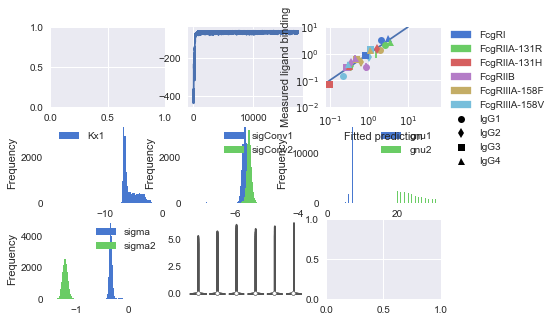

In [1]:
%matplotlib inline

from recepmod.figures import Figure2

#goodFits = dset[dset['LL'] > max(dset['LL'])-2]

f = Figure2.makeFigure()